In [34]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

In [35]:
data_folder = "../data/"

figures_folder = "../Figures/"

sif_output = "../sif_files/"

In [36]:
Huri = pd.read_csv('../data/HURI_full_data_trasnlated.csv', usecols=["source_UniProtKB-Swiss-Prot", "target_UniProtKB-Swiss-Prot"])

In [37]:
Huri

,source_UniProtKB-Swiss-Prot,target_UniProtKB-Swiss-Prot
0,Q9H2S6,Q9NPE6
1,Q9H2S6,Q9BXK5
2,Q9H2S6,O60238
3,Q9H2S6,P20138
4,Q9H2S6,Q9UM44
...,...,...
75885,O14737,Q92993
75886,P04792,O43707
75887,P04792,Q9NPF5
75888,P31749,Q12778


In [38]:
resources = Resources()

In [39]:
mapping = {"source_UniProtKB-Swiss-Prot": "source", "target_UniProtKB-Swiss-Prot": "target"}
resources.add_database(Huri, column_mapping=mapping,  reset_index=True)

In [40]:
group4_list = ['PRDM6',
 'KMT2D',
 'KMT2C',
 'KDM6A',
 'ZMYM3',
 'MED12',
 'GFI1B',
 'MYCN',
 'OTX2',
 'ZIC1',
 'GFI1',
 'TBR1',
 'BRCA2',
 'KBTBD4',
 'CDK6',
 'ARID5B',
 'BARHL1',
 'CUX2',
 'DLX5',
 'EN2',
 'EOMES',
 'FOXP2',
 'LHX1',
 'LHX2',
 'LHX5',
 'LMX1A',
 'POU2F1',
 'SIX1',
 'SIX6',
 'TAL1',
 'UNCX']

In [41]:
group4_net = Network(group4_list, resources = resources.interactions)

Error: node KBTBD4 is not present in the resources database
Error: node ARID5B is not present in the resources database
Error: node BARHL1 is not present in the resources database
Error: node CUX2 is not present in the resources database
Error: node DLX5 is not present in the resources database
Error: node EN2 is not present in the resources database
Error: node LHX5 is not present in the resources database
Error: node UNCX is not present in the resources database


In [42]:
group4_net.nodes

,Genesymbol,Uniprot,Type
0,PRDM6,Q9NQX0,NaN
1,KMT2D,O14686,NaN
2,KMT2C,Q8NEZ4,NaN
3,KDM6A,O15550,NaN
4,ZMYM3,Q14202,NaN
5,MED12,Q93074,NaN
6,GFI1B,Q5VTD9,NaN
7,MYCN,P04198,NaN
8,OTX2,P32243,NaN
9,ZIC1,Q15915,NaN


In [43]:
%%time
group4_net.complete_connection(maxlen=4, algorithm="bfs", only_signed=False, connect_with_bias=False, consensus=False)

CPU times: user 11.8 s, sys: 1.79 ms, total: 11.8 s
Wall time: 11.8 s


In [44]:
group4_net.edges

,source,target,Type,Effect,References
0,Q9NQX0,Q92625,None,undefined,;
1,Q92625,P50222,None,undefined,;
2,P50222,O15550,None,undefined,;
3,Q9NQX0,Q9HAT0,None,undefined,;
4,Q9HAT0,Q9NZD8,None,undefined,;
...,...,...,...,...,...
383,P46527,P62993,None,undefined,
384,Q04864,P25800,None,undefined,
385,P42773,Q04864,None,undefined,
386,Q13526,Q5JR59,None,undefined,


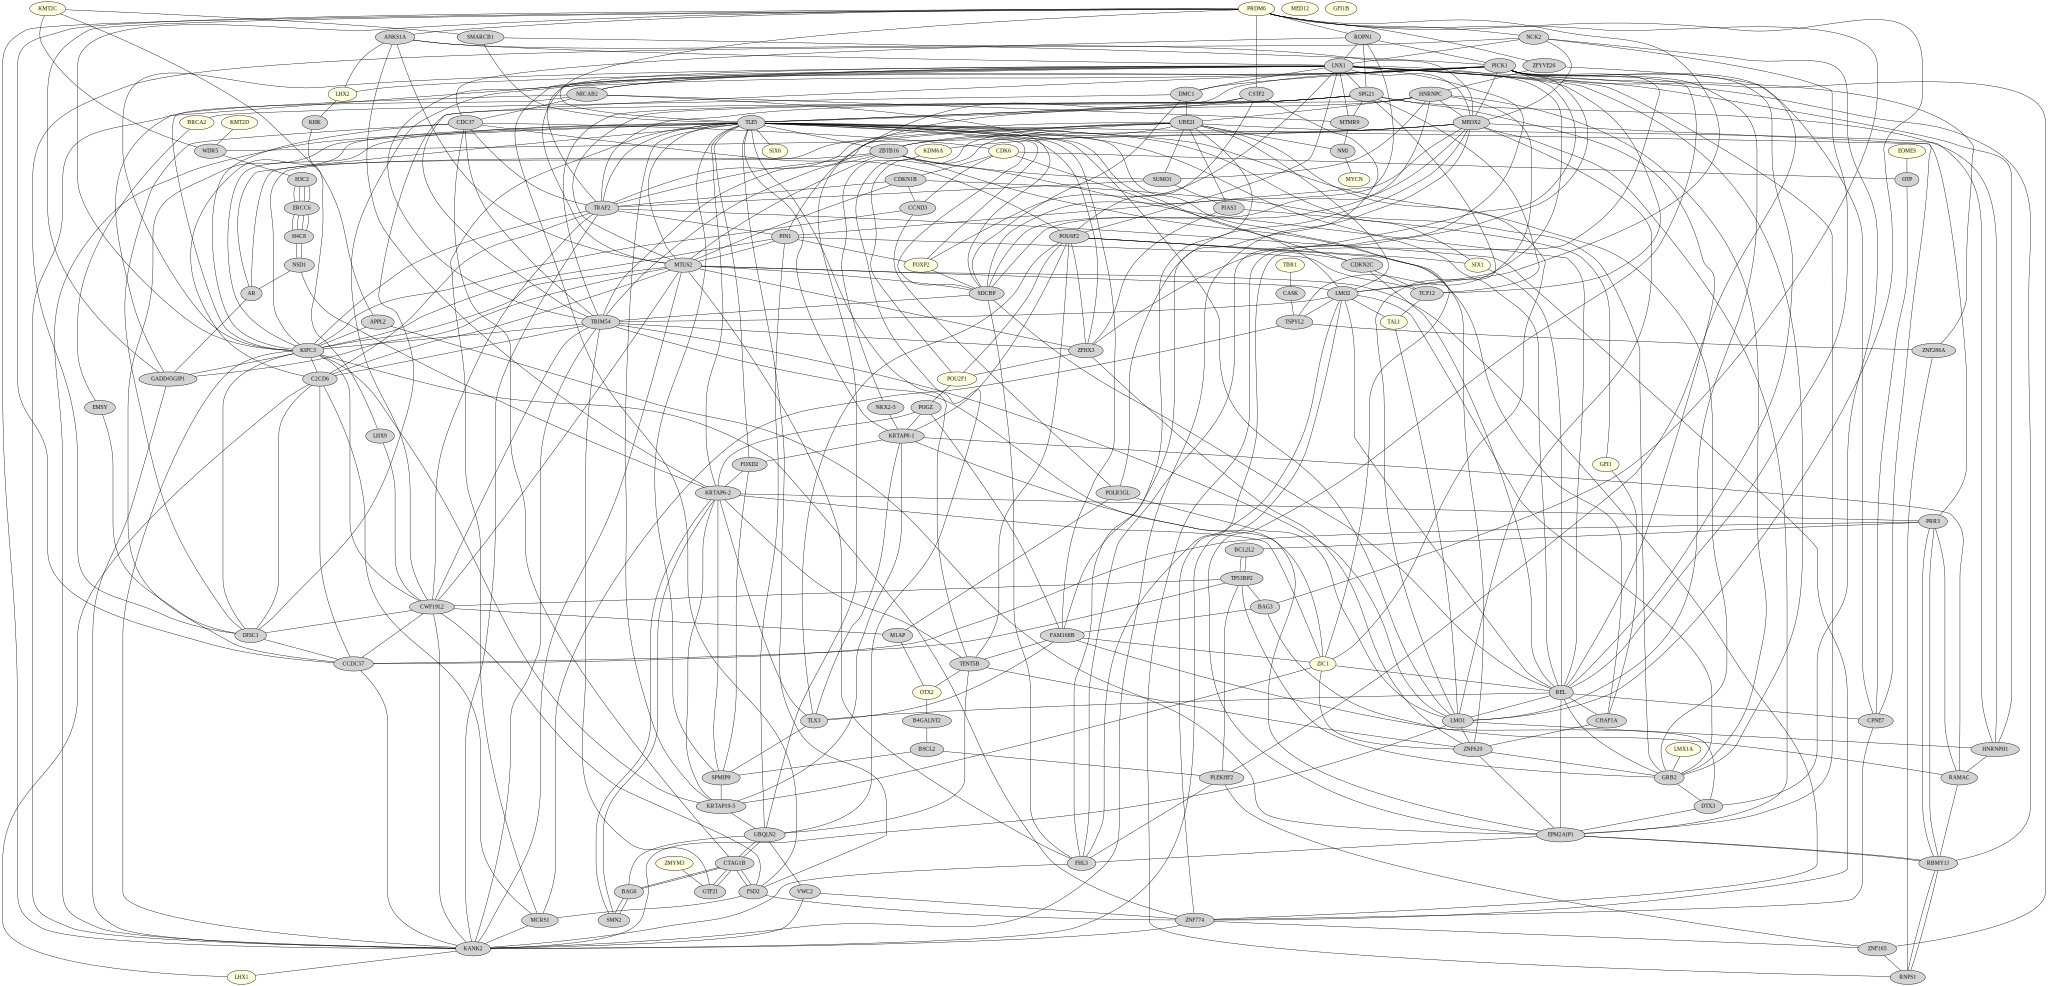

In [45]:
group4_visualizer = NetworkVisualizer(group4_net,color_by='effect', noi=True)
output = figures_folder + "group4_HURI"
group4_visualizer.render(output_file=output)

In [46]:
from neko._outputs.exports import Exports

In [47]:
export = Exports(group4_net)

In [48]:
folder = sif_output + "group4_HURI.sif"

In [49]:
export.export_sif(folder)